# Esquema para una Super-Plantilla DW (Ultra-bright)

## 1. Cargar librerías necesarias

In [154]:
# imports
import time
import os
import json

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab 
import scipy.stats as stats
import chardet
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

%matplotlib inline

## Cargar el dataset

In [157]:
ruta_archivo = './input/train.csv'
separador = ","
# caso csv
df = pd.read_csv(ruta_archivo, sep = separador)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Realizar el EDA automático

### Pandas-Profiling

In [ ]:
from pandas_profiling import ProfileReport

prof = ProfileReport(df)
nombre = input("¿Cómo llamo al informe? ") + '.html'
prof.to_file(output_file=nombre)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [165]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## DW

In [167]:
df_copia = df.copy()

### Obtenemos Info()

In [168]:
df.info()
# df.dtypes[df.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Si Pandas no reconoce correctamente el tipo de alguna columna, resolver.

In [169]:
# no tiene que resolverse en el propio pandas, se pueden utilizar otras herramientas

# corregimos PClass y Survived para que sean categóricos
df['Pclass'] = df['Pclass'].replace(to_replace=[1,2,3], value=["1","2","3"])
df['Survived'] = df['Survived'].replace(to_replace=[1, 0], value=["S","N"])
# también Passenger ID
df['PassengerId']=df['PassengerId'].astype(object)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 83.7+ KB


In [171]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,N,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,S,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,N,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Separamos columnas numéricas de categóricas en listas distintas. Separamos en otra lista las columnas temporales.

In [172]:
numericas= [x for x in df.dtypes.index if (df.dtypes[x]=='float64' or df.dtypes[x]=='int64')]
categoricas= [x for x in df.dtypes.index if df.dtypes[x]=='object']
temporales = [x for x in df.dtypes.index if df.dtypes[x]=='datetime64']

# otras separaciones podrían ser
# if df.dtypes[x]=='bool'
# if df.dtypes[x]=='category'
print("Numericas:",numericas)
print("Categoricas:",categoricas)
print("Tiempo:",temporales)

Numericas: ['Age', 'SibSp', 'Parch', 'Fare']
Categoricas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Tiempo: []


### Extraemos información necesaria del EDA automático, o del nuestro:
##### - Nulos por columna

In [174]:
df.isnull().sum()
# df.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### - % valores únicos por filas y columnas

In [175]:
#print(df.nunique())  # columnas
# df.nunique(axis=1)  # filas
# voy a aplicarlo a las categóricas solo
df[categoricas].nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Ticket         681
Cabin          147
Embarked         3
dtype: int64

##### - Número de elementos por categoría en cada una de las columnas categóricas

In [177]:
for col in categoricas:
    if (col !="PassengerId" and col != "Name"):
        print('\nFrecuencia de categorias para la columna %s'%col)
        print(df[col].value_counts(normalize=True)*100)

# Intentamos localizar si hay categorias raras


Frecuencia de categorias para la columna Survived
N    61.616162
S    38.383838
Name: Survived, dtype: float64

Frecuencia de categorias para la columna Pclass
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

Frecuencia de categorias para la columna Sex
male      64.758698
female    35.241302
Name: Sex, dtype: float64

Frecuencia de categorias para la columna Ticket
347082      0.785634
CA. 2343    0.785634
1601        0.785634
3101295     0.673401
CA 2144     0.673401
              ...   
9234        0.112233
19988       0.112233
2693        0.112233
PC 17612    0.112233
370376      0.112233
Name: Ticket, Length: 681, dtype: float64

Frecuencia de categorias para la columna Cabin
B96 B98        1.960784
G6             1.960784
C23 C25 C27    1.960784
C22 C26        1.470588
F33            1.470588
                 ...   
E34            0.490196
C7             0.490196
C54            0.490196
E36            0.490196
C148           0.490196
Name: Cabin, Length

##### - Posibles Outliers en columnas numéricas

In [178]:
# Distribución normal gausiana
for col in numericas:
    Ug = df[col].mean() + 3* df[col].std()
    Lg = df[col].mean() - 3* df[col].std()
    print("Calculo limite outliers (Gausiana) para la columna ",col)
    print("Superior:",Ug,"Inferior:",Lg)
    print("--------------------------------------------------")
    print("Número de posibles outliers en la columna",col)
    print('Menos que L3.0 Normal: {}'.format(df[df[col] < Lg].shape[0]))
    print('Mas que U3.0 Normal: {}'.format(df[df[col] > Ug].shape[0]))

Calculo limite outliers (Gausiana) para la columna  Age
Superior: 73.27860964406094 Inferior: -13.880374349943303
--------------------------------------------------
Número de posibles outliers en la columna Age
Menos que L3.0 Normal: 0
Mas que U3.0 Normal: 2
Calculo limite outliers (Gausiana) para la columna  SibSp
Superior: 3.831238153221485 Inferior: -2.7852224405391057
--------------------------------------------------
Número de posibles outliers en la columna SibSp
Menos que L3.0 Normal: 0
Mas que U3.0 Normal: 30
Calculo limite outliers (Gausiana) para la columna  Parch
Superior: 2.799765378316893 Inferior: -2.0365779484627966
--------------------------------------------------
Número de posibles outliers en la columna Parch
Menos que L3.0 Normal: 0
Mas que U3.0 Normal: 15
Calculo limite outliers (Gausiana) para la columna  Fare
Superior: 181.2844937601173 Inferior: -116.87607782296804
--------------------------------------------------
Número de posibles outliers en la columna Fare


In [179]:
# Distribución IQR 1.5 (no normal)
for col in numericas:
    IQR15 = df[col].quantile(0.75) - df[col].quantile(0.25)
    L15 = df[col].quantile(0.25) - (IQR15 * 1.5)
    U15 = df[col].quantile(0.75) + (IQR15 * 1.5)
    print("Calculo limite outliers (IQR 1.5) para la columna ",col)
    print("Superior:",U15,"Inferior:",L15,"IQR:",IQR15)
    print("--------------------------------------------------")
    print("Número de posibles outliers en la columna",col)
    print('Menos que L1.5: {}'.format(df[df[col] < L15].shape[0]))
    print('Mas que U1.5: {}'.format(df[df[col] > U15].shape[0]))

Calculo limite outliers (IQR 1.5) para la columna  Age
Superior: 64.8125 Inferior: -6.6875 IQR: 17.875
--------------------------------------------------
Número de posibles outliers en la columna Age
Menos que L1.5: 0
Mas que U1.5: 11
Calculo limite outliers (IQR 1.5) para la columna  SibSp
Superior: 2.5 Inferior: -1.5 IQR: 1.0
--------------------------------------------------
Número de posibles outliers en la columna SibSp
Menos que L1.5: 0
Mas que U1.5: 46
Calculo limite outliers (IQR 1.5) para la columna  Parch
Superior: 0.0 Inferior: 0.0 IQR: 0.0
--------------------------------------------------
Número de posibles outliers en la columna Parch
Menos que L1.5: 0
Mas que U1.5: 213
Calculo limite outliers (IQR 1.5) para la columna  Fare
Superior: 65.6344 Inferior: -26.724 IQR: 23.0896
--------------------------------------------------
Número de posibles outliers en la columna Fare
Menos que L1.5: 0
Mas que U1.5: 116


In [180]:
# Distribución IQR 3 (extrema no normal)
for col in numericas:
    IQR3 = df[col].quantile(0.75) - df[col].quantile(0.25)
    L3 = df[col].quantile(0.25) - (IQR3 * 3)
    U3 = df[col].quantile(0.75) + (IQR3 * 3)
    print("Calculo limite outliers (IQR 3) para la columna ",col)
    print("Superior:",U3,"Inferior:",L3,"IQR:",IQR3)
    print("--------------------------------------------------")
    print("Número de posibles outliers en la columna",col)
    print('Menos que L3.0: {}'.format(df[df[col] < L3].shape[0]))
    print('Mas que U3.0: {}'.format(df[df[col] > U3].shape[0]))

Calculo limite outliers (IQR 3) para la columna  Age
Superior: 91.625 Inferior: -33.5 IQR: 17.875
--------------------------------------------------
Número de posibles outliers en la columna Age
Menos que L3.0: 0
Mas que U3.0: 0
Calculo limite outliers (IQR 3) para la columna  SibSp
Superior: 4.0 Inferior: -3.0 IQR: 1.0
--------------------------------------------------
Número de posibles outliers en la columna SibSp
Menos que L3.0: 0
Mas que U3.0: 12
Calculo limite outliers (IQR 3) para la columna  Parch
Superior: 0.0 Inferior: 0.0 IQR: 0.0
--------------------------------------------------
Número de posibles outliers en la columna Parch
Menos que L3.0: 0
Mas que U3.0: 213
Calculo limite outliers (IQR 3) para la columna  Fare
Superior: 100.2688 Inferior: -61.358399999999996 IQR: 23.0896
--------------------------------------------------
Número de posibles outliers en la columna Fare
Menos que L3.0: 0
Mas que U3.0: 53


##### - Filas duplicadas

In [181]:
df.duplicated().sum()

0

##### - (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

In [182]:
df.drop(["PassengerId","Name"],axis = 1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,N,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,S,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,S,1,female,35.0,1,0,113803,53.1000,C123,S
4,N,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,N,2,male,27.0,0,0,211536,13.0000,NaN,S
887,S,1,female,19.0,0,0,112053,30.0000,B42,S
888,N,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,S,1,male,26.0,0,0,111369,30.0000,C148,C


In [183]:
categoricas = [c for c in categoricas if (c !="PassengerId" and c != "Name")]
categoricas

['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [184]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Limpieza de nulos
##### - Estrategia: Eliminación "con violencia" de filas o columnas con nulos

In [149]:
# todas las columnas que tengan algun nulo
df.dropna(axis=1)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,N,3,male,1,0,A/5 21171,7.2500
1,S,1,female,1,0,PC 17599,71.2833
2,S,3,female,0,0,STON/O2. 3101282,7.9250
3,S,1,female,1,0,113803,53.1000
4,N,3,male,0,0,373450,8.0500
...,...,...,...,...,...,...,...
886,N,2,male,0,0,211536,13.0000
887,S,1,female,0,0,112053,30.0000
888,N,3,female,1,2,W./C. 6607,23.4500
889,S,1,male,0,0,111369,30.0000


In [150]:
# todas las columnas con todos nulos
df.dropna(axis=1,how='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,N,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,S,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,S,1,female,35.0,1,0,113803,53.1000,C123,S
4,N,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,N,2,male,27.0,0,0,211536,13.0000,NaN,S
887,S,1,female,19.0,0,0,112053,30.0000,B42,S
888,N,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,S,1,male,26.0,0,0,111369,30.0000,C148,C


In [151]:
# todas las filas con todos nulos
df.dropna(axis=0,how='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,N,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,S,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,S,1,female,35.0,1,0,113803,53.1000,C123,S
4,N,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,N,2,male,27.0,0,0,211536,13.0000,NaN,S
887,S,1,female,19.0,0,0,112053,30.0000,B42,S
888,N,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,S,1,male,26.0,0,0,111369,30.0000,C148,C


In [152]:
# todas las filas que tengan algun nulo
df.dropna(axis=0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,S,1,female,35.0,1,0,113803,53.1000,C123,S
6,N,1,male,54.0,0,0,17463,51.8625,E46,S
10,S,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,S,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,S,1,female,47.0,1,1,11751,52.5542,D35,S
872,N,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,S,1,female,56.0,0,1,11767,83.1583,C50,C
887,S,1,female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# En caso de que quiera eliminar filas de una columna cualquiera.
df['Embarked'].dropna(axis=0)

In [ ]:
# eliminar una determinada columna (porque sí)
correcto = False
while not(correcto):
    clnul = []
    for cl in df.columns:
        if df[cl].isnull().sum()>0:
            clnul.append(cl)
    print(clnul)
    columna = input("Nombre de columna a eliminar:")
    if columna in clnul:
        correcto=True
        del df[columna]

##### - Estrategia: rellenado valor fijo (con 0s, etc)

In [185]:
# rellenar una determinada columna con valor fijo
# aquí determinamos el valor fijo con el que rellenar
valor_fijo = "G"
# comenzamos
correcto = False
while not(correcto):
    clnul = []
    for cl in df.columns:
        if df[cl].isnull().sum()>0:
            clnul.append(cl)
    print(clnul)
    columna = input("Nombre de columna a rellenar")
    if columna in clnul:
        correcto=True
        df[columna].fillna(valor_fijo, inplace=True)

['Age', 'Cabin', 'Embarked']
Nombre de columna a rellenarCabin


##### - Estrategia: media, mediana, moda (En categóricos, se utiliza el "valor más frecuente" algo parecido a la moda)

In [ ]:
# rellenar una determinada columna con media, mediana o moda en numéricas
correcto = False
while not(correcto):
    clnul = []
    for cl in numericas:
        if df[cl].isnull().sum()>0:
            clnul.append(cl)
    print(clnul)
    columna = input("Nombre de columna a rellenar:")
    if columna in clnul:
        correcto=True
        operacion = ""
        while operacion not in ["mediana","moda","media"]:
            operacion = input("Operacion de relleno (mediana/media/moda):")
            if operacion == "mediana":
                m = df[columna].median()
            elif operacion == "media":
                m = df[columna].mean()
            elif operacion == "moda":
                m = df[columna].mode()
            else:
                print("Escoger una de las tres posibles")
                
        df[columna].fillna(m,inplace=True)

In [ ]:
# rellenar una determinada columna con el valor más frecuente en categóricas
correcto = False
while not(correcto):
    clnul = []
    for cl in categoricas:
        if df[cl].isnull().sum()>0:
            clnul.append(cl)
    print(clnul)
    columna = input("Nombre de columna a rellenar:")
    if columna in clnul:
        correcto=True
        mas_frecuente = df.groupby([columna])[columna].count().sort_values(ascending=False).index[0]
        print("Se rellenará con",mas_frecuente)
        df[columna].fillna(mas_frecuente,inplace=True)

##### - Estrategia: valores extremos de la distribución

In [ ]:
# solo para numéricas
correcto = False
while not(correcto):
    clnul = []
    for cl in numericas:
        if df[cl].isnull().sum()>0:
            clnul.append(cl)
    print(clnul)
    columna = input("Nombre de columna a rellenar:")
    if columna in clnul:
        correcto=True
        factor_extremo = int(input("Introduzca el factor (1.5/2/2.5/3):"))
        mediana = df[columna].median()
        extremo = df[columna].mean()+factor_extremo*df[columna].std()
        # extremo = df[columna].mean()-factor_extremo*df[columna].std()
        df[columna].fillna(extremo, inplace=True)

##### - Estrategia: valores aleatorios dentro del rango de valores de la columna

In [ ]:
# sirve para todas las columnas
# definimos la función que lo va a hacer todo
def random_na(df, variable):
    # creamos la variable
    df[variable+'_random'] = df[variable]
    # Tomamos la muestra aleatoria para rellenar
    
    random_sample = df[variable].sample(df[variable].isnull().sum(), random_state=0)
    # pandas necesita que los dos datasets tengan el mismo indice para que los pueda encajar
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    return df
    
correcto = False
while not(correcto):
    clnul = []
    for cl in df.columns:
        if df[cl].isnull().sum()>0:
            clnul.append(cl)
    print(clnul)
    columna = input("Nombre de columna a rellenar:")
    if columna in clnul:
        correcto=True
        # llamamos a la funcion anterior
        df = random_na(df,columna)

In [97]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
dtype: int64

##### - Estrategia: ML

In [186]:
# Resolver el tema de one_hot y que ya te aparte las de alta cardinalidad
df_u = df[categoricas].nunique()/df.shape[0]
df_u = df_u.sort_values(ascending=False).rename('cardinalidad')
df_uf = df_u.rename_axis('columna').reset_index()
df_uf

,columna,cardinalidad
0,Ticket,0.764310
1,Cabin,0.166105
2,Pclass,0.003367
3,Embarked,0.003367
4,Survived,0.002245
5,Sex,0.002245


In [187]:
lista_negra = []
limite = int(input("Introduce el % limite máximo de cardinalidad: Entre 0 y 100:"))
limite = limite /100
for index, row in df_uf.iterrows():
    if row['cardinalidad']>=limite:
        if row['columna'] in categoricas:
            lista_negra.append(row['columna'])
print("Lista negra",lista_negra)

Introduce el % limite máximo de cardinalidad: Entre 0 y 100:30
Lista negra ['Ticket']


In [188]:
df_null = df.isnull().sum().sort_values(ascending=True).rename('suma')
df_null

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
Age         177
Name: suma, dtype: int64

In [189]:
# - Ordenar las columnas por número de nulos que tengan
df_null = df.isnull().sum().sort_values(ascending=True).rename('suma')
# Convirtiendo el índice que son las columnas en Columna
dford = df_null.rename_axis('columna').reset_index()
dford

,columna,suma
0,Survived,0
1,Pclass,0
2,Sex,0
3,SibSp,0
4,Parch,0
5,Ticket,0
6,Fare,0
7,Cabin,0
8,Embarked,2
9,Age,177


In [190]:
# y ahora recorremos las filas para que las columnas con valor 0 pasarán a la lista_sin
# el resto pasarán a lista_con
lista_sin = []
lista_con = []
for index, row in dford.iterrows():
    if row['suma']==0:
        lista_sin.append(row['columna'])
    else:
        lista_con.append(row['columna'])
print("Sin nulos",lista_sin)
print("Con nulos",lista_con)

Sin nulos ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
Con nulos ['Embarked', 'Age']


In [191]:
# antes de pasar a aplicar fillML, vamos a quitar aquellas columnas con alta cardinalidad
# que hemos puesto en la lista negra y asignaremos a quién habrá que hacerle el one-hot
n_lista_sin=[]
n_lista_one =[]
for col in lista_sin:
    if col not in lista_negra:
        n_lista_sin.append(col)
        if col in categoricas:
            n_lista_one.append(col)

n_lista_con=[]
for col in lista_con:
    if col not in lista_negra:
        n_lista_con.append(col)

print("Lista negra",lista_negra)
print("\nAntigua lista sin nulos",lista_sin)        
print("Nueva lista sin nulos",n_lista_sin)
print("Antigua lista con nulos",lista_con)
print("Nueva lista con nulos",n_lista_con)
print("\nLista para aplicar one_hot",n_lista_one)

Lista negra ['Ticket']

Antigua lista sin nulos ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
Nueva lista sin nulos ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin']
Antigua lista con nulos ['Embarked', 'Age']
Nueva lista con nulos ['Embarked', 'Age']

Lista para aplicar one_hot ['Survived', 'Pclass', 'Sex', 'Cabin']


In [192]:
# Y ahora, hacemos un one hot ultra rápido para todas aquellas categóricas que nos queden en
# lista_sin

# Se podria hacer de este modo hasta la versión 1.19 de pandas
df_ML=df.copy()
df_one = pd.get_dummies(data=df_ML[n_lista_one], columns=n_lista_one)
columnas = df_one.columns
print(columnas)
df_one

Index(['Survived_N', 'Survived_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Cabin_A10', 'Cabin_A14', 'Cabin_A16',
       ...
       'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33',
       'Cabin_F38', 'Cabin_F4', 'Cabin_G', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=155)


,Survived_N,Survived_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G,Cabin_G6,Cabin_T
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
887,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# y ahora primero las pasamos al df
#df_ML=df_ML.drop(n_lista_one,axis=1)
df_ML =pd.concat([df_ML,df_one],axis=1)
df_ML

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G,Cabin_G6,Cabin_T
0,N,3,male,22.0,1,0,A/5 21171,7.2500,G,S,...,0,0,0,0,0,0,0,1,0,0
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,0,0,0,0,0,0
2,S,3,female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,...,0,0,0,0,0,0,0,1,0,0
3,S,1,female,35.0,1,0,113803,53.1000,C123,S,...,0,0,0,0,0,0,0,0,0,0
4,N,3,male,35.0,0,0,373450,8.0500,G,S,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,N,2,male,27.0,0,0,211536,13.0000,G,S,...,0,0,0,0,0,0,0,1,0,0
887,S,1,female,19.0,0,0,112053,30.0000,B42,S,...,0,0,0,0,0,0,0,0,0,0
888,N,3,female,NaN,1,2,W./C. 6607,23.4500,G,S,...,0,0,0,0,0,0,0,1,0,0
889,S,1,male,26.0,0,0,111369,30.0000,C148,C,...,0,0,0,0,0,0,0,0,0,0


In [194]:
print(n_lista_sin)
crudas_sin = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin']

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin']


In [195]:
# quitamos de n_lista_sin las columnas de n_lista_one
for ele in n_lista_one:
    n_lista_sin.remove(ele)

In [196]:
print(n_lista_sin)
# y ahora añadimos los que se han creado con el one_hot
for ele in columnas:
    n_lista_sin.append(ele)
n_lista_sin

['SibSp', 'Parch', 'Fare']


['SibSp',
 'Parch',
 'Fare',
 'Survived_N',
 'Survived_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Cabin_A10',
 'Cabin_A14',
 'Cabin_A16',
 'Cabin_A19',
 'Cabin_A20',
 'Cabin_A23',
 'Cabin_A24',
 'Cabin_A26',
 'Cabin_A31',
 'Cabin_A32',
 'Cabin_A34',
 'Cabin_A36',
 'Cabin_A5',
 'Cabin_A6',
 'Cabin_A7',
 'Cabin_B101',
 'Cabin_B102',
 'Cabin_B18',
 'Cabin_B19',
 'Cabin_B20',
 'Cabin_B22',
 'Cabin_B28',
 'Cabin_B3',
 'Cabin_B30',
 'Cabin_B35',
 'Cabin_B37',
 'Cabin_B38',
 'Cabin_B39',
 'Cabin_B4',
 'Cabin_B41',
 'Cabin_B42',
 'Cabin_B49',
 'Cabin_B5',
 'Cabin_B50',
 'Cabin_B51 B53 B55',
 'Cabin_B57 B59 B63 B66',
 'Cabin_B58 B60',
 'Cabin_B69',
 'Cabin_B71',
 'Cabin_B73',
 'Cabin_B77',
 'Cabin_B78',
 'Cabin_B79',
 'Cabin_B80',
 'Cabin_B82 B84',
 'Cabin_B86',
 'Cabin_B94',
 'Cabin_B96 B98',
 'Cabin_C101',
 'Cabin_C103',
 'Cabin_C104',
 'Cabin_C106',
 'Cabin_C110',
 'Cabin_C111',
 'Cabin_C118',
 'Cabin_C123',
 'Cabin_C124',
 'Cabin_C125',
 'Cabin_C126',
 'Cabin_C

In [197]:
import pickle
# - Hacer la función fillML para cada columna con nulos en ese orden.
def fill_ML(df, objetivo, tipo='regresion'):
    """
    df es un dataframe que tiene las columnas sin nulos + la columna objetivo
    objetivo es la columna a resolver los nulos
    tipo es...
    """
    
    df_sin_nulos = df.drop(df[df[objetivo].isnull()].index, axis=0)
    df_con_nulos = df.drop(df_sin_nulos.index,axis=0)

    y = df_sin_nulos[objetivo]
    X = df_sin_nulos.drop([objetivo],axis=1)
    

    if tipo.lower() == 'regresion':
        modelo = ExtraTreesRegressor(n_estimators=250, random_state=0)
    elif tipo.lower() == 'clasificacion':
        modelo = ExtraTreesClassifier(n_estimators=250, random_state=0)

    modelo.fit(X, y)
    # algo que nos guarde el modelo entrenado y la columna que ha sido su objetivo
    pickle.dump(modelo,open("mod-"+objetivo+".pickle","wb"))
    
    X_con = df_con_nulos.drop([objetivo],axis=1)
    
    if tipo.lower() == 'regresion':
        Prediccion = np.round(modelo.predict(X_con))
    elif tipo.lower() == 'clasificacion':
        Prediccion = modelo.predict(X_con)
    return Prediccion


In [198]:
df[crudas_sin].isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Cabin       0
dtype: int64

In [199]:
# Que nos cree todos los modelos de aquellas columnas que no tienen nulos
for objetivo in crudas_sin:
    if objetivo in numericas:
        operacion = "regresion"
    elif objetivo in categoricas:
        operacion = "clasificacion"
    else:
        continue
    print("Procesando ",objetivo," con operacion ", operacion)
    
    lis = []
    lis.append(objetivo)
    for e in n_lista_sin:
        if e.startswith(objetivo):
            continue
        else:
            lis.append(e)
    df1 = df_ML[lis]
    
    y = df1[objetivo]
    X = df1.drop([objetivo],axis=1)
    

    if operacion.lower() == 'regresion':
        modelo = ExtraTreesRegressor(n_estimators=250, random_state=0)
    elif operacion.lower() == 'clasificacion':
        modelo = ExtraTreesClassifier(n_estimators=250, random_state=0)

    modelo.fit(X, y)
    # algo que nos guarde el modelo entrenado y la columna que ha sido su objetivo
    pickle.dump(modelo,open("mod-"+objetivo+".pickle","wb"))
    

Procesando  Survived  con operacion  clasificacion
Procesando  Pclass  con operacion  clasificacion
Procesando  Sex  con operacion  clasificacion
Procesando  SibSp  con operacion  regresion
Procesando  Parch  con operacion  regresion
Procesando  Fare  con operacion  regresion
Procesando  Cabin  con operacion  clasificacion


In [200]:
print(n_lista_con)

['Embarked', 'Age']


In [201]:
# hacemos el proceso de ML para todas las columnas que aún tengan nulos.
for objetivo in n_lista_con:
    if objetivo in numericas:
        operacion = "regresion"
    elif objetivo in categoricas:
        operacion = "clasificacion"
    else:
        continue
    print("Procesando ",objetivo," con operacion ", operacion)
    # creamos el dataframe
    lis = []
    lis.append(objetivo)
    for e in n_lista_sin:
        lis.append(e)
    df1 = df_ML[lis]
    # realizamos el fill_ML
    df.loc[df[objetivo].isnull(), objetivo] = fill_ML(df1, objetivo, operacion)
    # pasamos objetivo a la lista de columnas sin nulos
    if objetivo in categoricas:
        # hay que pasarla primero a one_hot
        df_one = pd.get_dummies(data=df_ML[objetivo], columns=objetivo)
        columnas = df_one.columns
        # y ahora primero las pasamos al df
        df_ML = df_ML.drop([objetivo],axis=1)
        df_ML =pd.concat([df_ML,df_one],axis=1)
    # vamos añadiendo todas las columnas one_hot que hayan salido
    for col in columnas:
        n_lista_sin.append(col)
df.isnull().sum()

Procesando  Embarked  con operacion  clasificacion
Procesando  Age  con operacion  regresion


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Tratamiento de outliers

Solo es recomendable si en verdad esos outliers son producto del error.

In [ ]:
# Utilizando Gaussian
for colu in numericas:
    respuesta = input("¿Corregimos los outliers de la columna ",colu,"(S/N)?")
    if respuesta.lower()=="s":
        df.loc[df[colu] > Ug, colu] = Ug
        df.loc[df[colu] < Lg, colu] = Lg

In [ ]:
# Utilizando Interquantil 1.5
for colu in numericas:
    respuesta = input("¿Corregimos los outliers de la columna ",colu,"(S/N)?")
    if respuesta.lower()=="s":
        df.loc[df[colu] > U15, colu] = U15
        df.loc[df[colu] < L15, colu] = L15

In [ ]:
# Utilizando Interquantil 3.0
for colu in numericas:
    respuesta = input("¿Corregimos los outliers de la columna ",colu,"(S/N)?")
    if respuesta.lower()=="s":
        df.loc[df[colu] > U30, colu] = U30
        df.loc[df[colu] < L30, colu] = L30

###> Agrupamiento de categorias con pocas filas asociadas (raros)

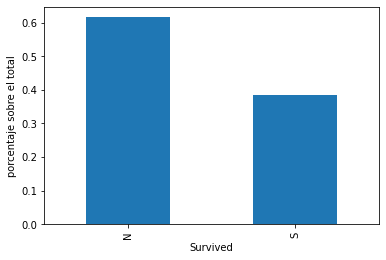

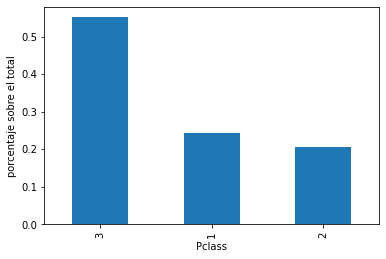

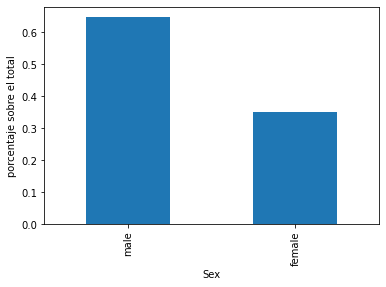

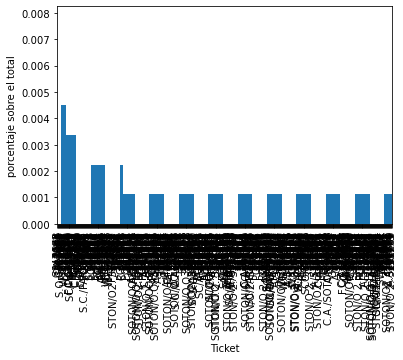

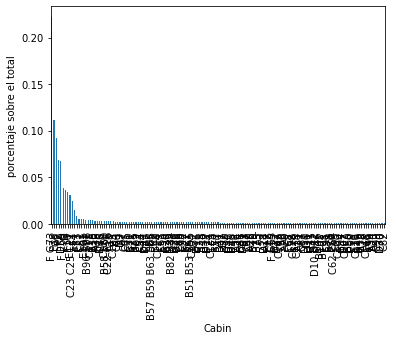

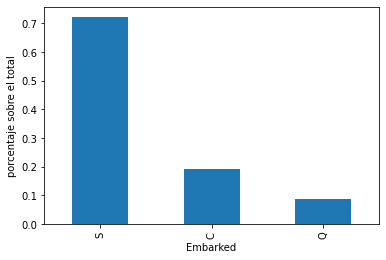

S    0.722783
C    0.190797
Q    0.086420
Name: Embarked, dtype: float64

In [41]:
# Esto depende de cada dataset. Por ello que nos basaremos en lo que se ha sacado en el 4.4
# Sin embargo el siguiente código puede ayudar

# Primero vamos a ver qué tal de frecuentes son los valores en las distintas variables categóricas
total = len(df)

for col in categoricas:
    # contamos las filas por etiqueta y dividimos por el total 
    temp_df = pd.Series(df[col].value_counts() / total)
    # renombramos las columnas
    temp_df.columns = [col, col + '_perc_raro']
    # hacemos un gráfico
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('porcentaje sobre el total')
    plt.show()
    
# Ordenamos para ver quien son más raros y quien menos
temp_df.sort_values(ascending=False)
temp_df

In [42]:
# este limite nos va a servir para determinar qué porcentaje (de 0 a 1) es considerado raro.
limite = 0.2
# Mostramos aquellas características que están por encima del límite. "Las NO raras"
temp_df[temp_df >= limite].index

Index(['S'], dtype='object')

In [43]:
# Creamos un diccionario para reemplazar las etiquetas raras, con la cadena "rara"
grouping_dict = {
    k: ('otros' if k not in temp_df[temp_df >= limite].index else k) for k in temp_df.index
}
# y el resultado es:
grouping_dict

{'S': 'S', 'C': 'otros', 'Q': 'otros'}

In [44]:
# reemplazammos las categorías necesarias
for col in ['Embarked']:
#for col in categoricas:
    df[col+'_grouped'] = df[col].map(grouping_dict)
    df[[col, col+'_grouped']].head(10)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_grouped
0,N,3,male,22.0,1,0,A/5 21171,7.2500,F G73,S,S
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C,otros
2,S,3,female,26.0,0,0,STON/O2. 3101282,7.9250,E121,S,S
3,S,1,female,35.0,1,0,113803,53.1000,C123,S,S
4,N,3,male,35.0,0,0,373450,8.0500,F G73,S,S
...,...,...,...,...,...,...,...,...,...,...,...
886,N,2,male,27.0,0,0,211536,13.0000,D56,S,S
887,S,1,female,19.0,0,0,112053,30.0000,B42,S,S
888,N,3,female,28.0,1,2,W./C. 6607,23.4500,G6,S,S
889,S,1,male,26.0,0,0,111369,30.0000,C148,C,otros


In [ ]:
df.drop(["Survived_grouped","Pclass_grouped","Sex_grouped","Ticket_grouped","Cabin_grouped"],axis=1,inplace=True)

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_grouped
0,N,3,male,22.0,1,0,A/5 21171,7.2500,F G73,S,S
1,S,1,female,38.0,1,0,PC 17599,71.2833,C85,C,otros
2,S,3,female,26.0,0,0,STON/O2. 3101282,7.9250,E121,S,S
3,S,1,female,35.0,1,0,113803,53.1000,C123,S,S
4,N,3,male,35.0,0,0,373450,8.0500,F G73,S,S
...,...,...,...,...,...,...,...,...,...,...,...
886,N,2,male,27.0,0,0,211536,13.0000,D56,S,S
887,S,1,female,19.0,0,0,112053,30.0000,B42,S,S
888,N,3,female,28.0,1,2,W./C. 6607,23.4500,G6,S,S
889,S,1,male,26.0,0,0,111369,30.0000,C148,C,otros


###  Análisis y corrección de distribuciones

In [46]:
# definimos la función que dibuja el histograma y el Q-Q plot a la vez para una cierta columna
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

In [ ]:
# mostramos histograma y Q-Q plot de las columnas numéricas que elijamos
correcto = False
while not(correcto):
    print(numericas)
    columna = input("Nombre de columna a estudiar y modificar su distribución:")
    if columna in numericas:
        correcto=True
        diagnostic_plots(df, columna)

In [47]:
# ahora que ya vemos como está, pasamos a corregir las que no nos gusten
# se elige la que más nos guste
# creamos una copia para evitar añadir al df si no queremos
df2 = df.copy()

In [48]:
columna = "Age"

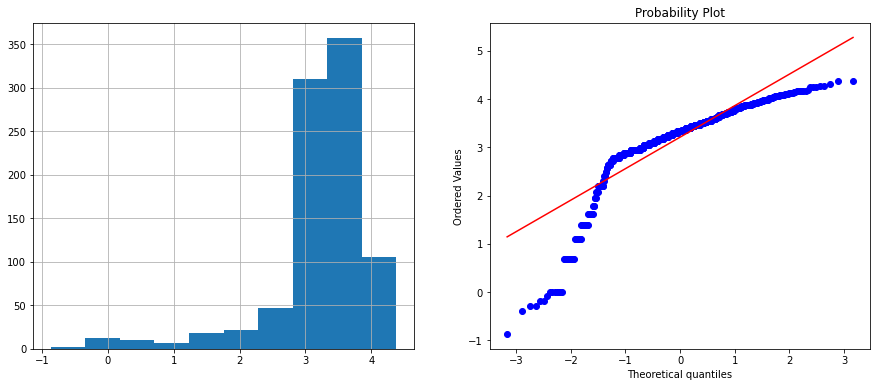

In [49]:
# transformación Logaritmica
df2[columna+'_log'] = np.log(df[columna])
diagnostic_plots(df2, columna+'_log')

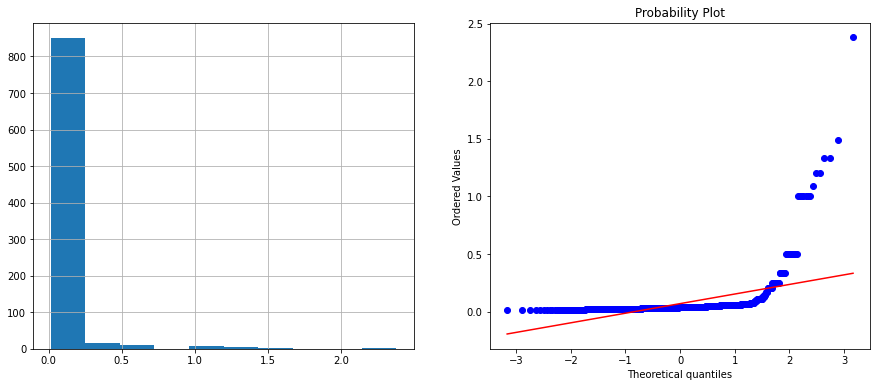

In [50]:
# Reciproca
df2[columna+'_reciprocal'] = 1 / df[columna]
diagnostic_plots(df2, columna+'_reciprocal')

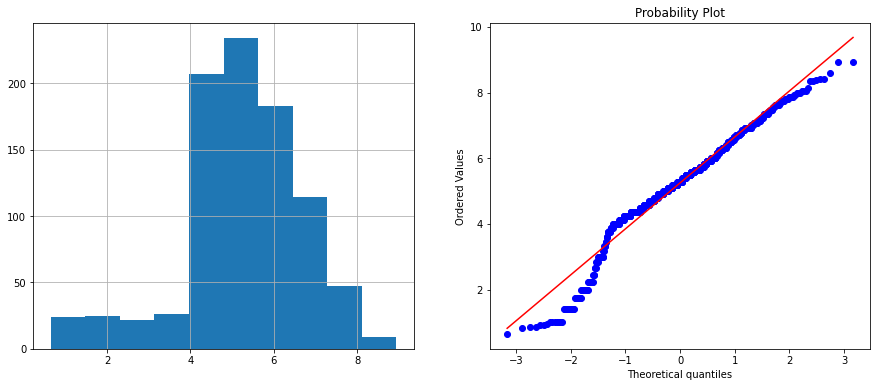

In [51]:
# transformacion de raiz cuadrada
df2[columna+'_sqr']  =df[columna]**(1/2)
diagnostic_plots(df2, columna+'_sqr')

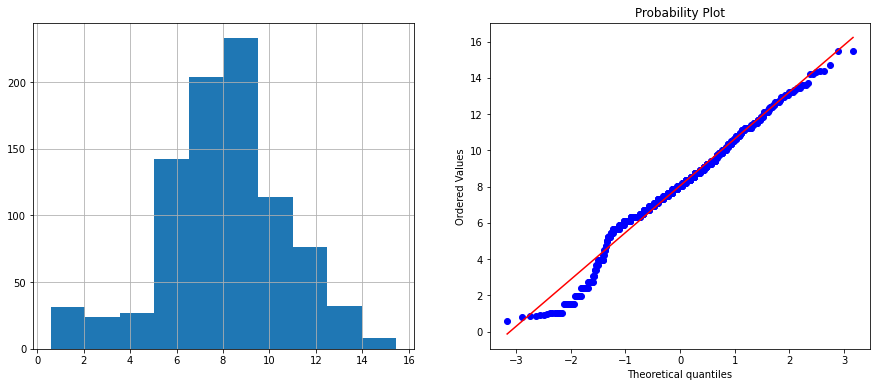

In [52]:
# aurea
df2[columna+'_aur']  = df[columna]**(1/1.6)
diagnostic_plots(df2, columna+'_aur')

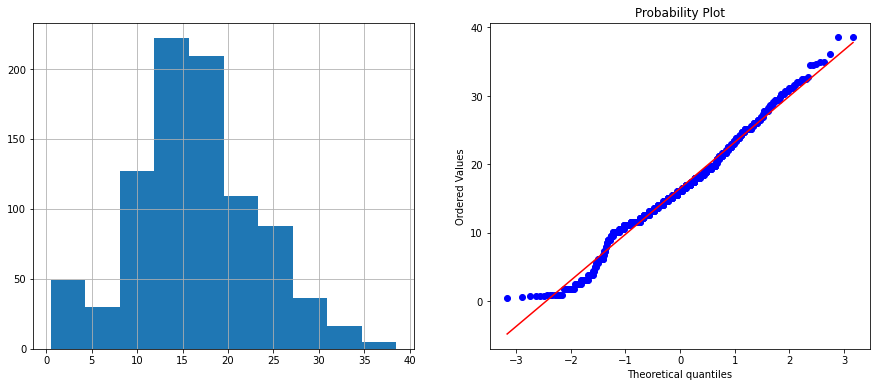

In [53]:
# exponencial
df2[columna+'_exp']  = df[columna]**(1/1.2)
diagnostic_plots(df2, columna+'_exp')

Optimal λ:  0.7568415466372059


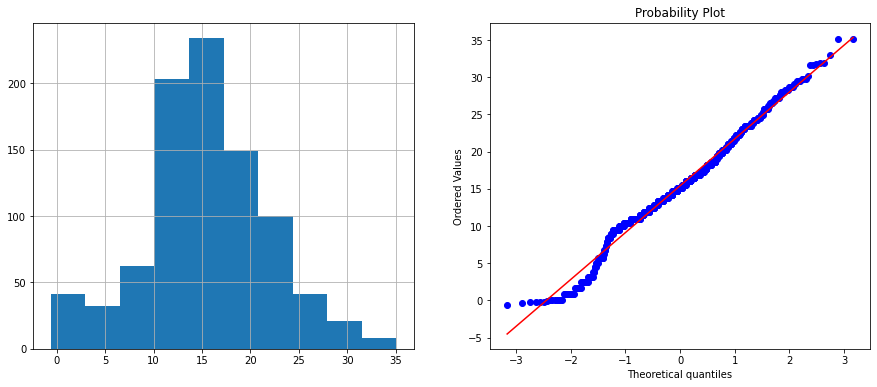

In [54]:
# boxcox
df2[columna+'_boxcox'], param = stats.boxcox(df[columna]) # ponemos la , porque da dos resultados
print('Optimal λ: ', param)
diagnostic_plots(df2, columna+'_boxcox')

In [ ]:
# una vez elegida la transformación, basta copiarla sin el df2,
# por ejemplo si hemos escogido la áurea
# aurea
df[columna+'_aur']  = df[columna]**(1/1.6)
diagnostic_plots(df, columna+'_aur')

### Correlaciones multivariable (numéricas)

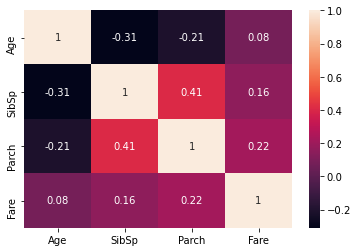

In [55]:
# En este punto, sólo podemos hacerlo con las columnas numéricas
df2=df[numericas]
# aplicamos
correlation_matrix = df2.corr().round(2)
# recordar que podemos introducir parámetros en la función .corr
# .corr(method='pearson', min_periods=1)*
# - method: aparte de pearson, puede ser además, kendall o spearman
# - min_periods: indica el número de periodos para que se considere una observación como válida

# annot=True te pone el valor de la correlacion
sns.heatmap(data=correlation_matrix, annot=True)

### Ingeniería de características

Este apartado está muy ligado a los datos, por lo que se rellenará con lo que se estime en cada dataset. Sólo se presentan ciertos apartados para ser trabajados si son necesarios.

##### - Agregaciones varias

In [57]:
df.drop(['Ticket_x','tipo','Embarked'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_grouped,Ticket_y
0,N,3,male,22.0,1,0,7.2500,F G73,S,1
1,S,1,female,38.0,1,0,71.2833,C85,otros,1
2,S,3,female,26.0,0,0,7.9250,E121,S,1
3,S,1,female,35.0,1,0,53.1000,C123,S,2
4,N,1,male,37.0,1,0,53.1000,C123,S,2
...,...,...,...,...,...,...,...,...,...,...
886,N,3,male,25.0,0,0,7.0500,F G73,S,1
887,N,2,male,27.0,0,0,13.0000,D56,S,1
888,S,1,female,19.0,0,0,30.0000,B42,S,1
889,S,1,male,26.0,0,0,30.0000,C148,otros,1


In [61]:
df['Cabin']=df['Cabin'].str.replace("F G","G")
df['Cabin']=df['Cabin'].str[0]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_grouped,Ticket_y
0,0,3,0,484.0,1,0,7.2500,G,1,1
1,1,1,1,1444.0,1,0,71.2833,C,0,1
2,1,3,1,676.0,0,0,7.9250,E,1,1
3,1,1,1,1225.0,1,0,53.1000,C,1,2
4,0,1,0,1369.0,1,0,53.1000,C,1,2
...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,625.0,0,0,7.0500,G,1,1
887,0,2,0,729.0,0,0,13.0000,D,1,1
888,1,1,1,361.0,0,0,30.0000,B,1,1
889,1,1,0,676.0,0,0,30.0000,C,0,1


In [62]:
df['Cabin'].value_counts()

G    281
F    215
D    124
E     96
C     95
B     56
A     23
T      1
Name: Cabin, dtype: int64

##### - Label encoding dirigido a resultados

In [72]:
# Hay que alinear todos los laben encoding
# df['tipoCarretera'] --> ['local','provincial','autonomica','nacional','autovia','autopista','autovia3']
#                             6   ,    5       ,     4      ,    3     ,    2    ,     1     ,     0

df['Survived'] = df['Survived'].replace(to_replace=["S", "N"], value=[1,0])
df['Sex'] = df['Sex'].replace(to_replace=["female", "male"], value=[1,0])
df['Embarked_grouped']= df['Embarked_grouped'].replace(to_replace=["S", "otros"], value=[1,0])
df['Pclass'] = df['Pclass'].replace(to_replace=[1,2,3], value=[3,2,1])
# también cabin se podria y tal vez sea mejor idea con One-Hot
df['Cabin'] = df['Cabin'].replace(to_replace=['T','A','B','C','D','E','F','G'], value=[6,6,5,4,3,2,1,0])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_grouped,Ticket_y
0,0,3,0,484.0,1,0,7.2500,0,1,1
1,1,1,1,1444.0,1,0,71.2833,4,0,1
2,1,3,1,676.0,0,0,7.9250,2,1,1
3,1,1,1,1225.0,1,0,53.1000,4,1,2
4,0,1,0,1369.0,1,0,53.1000,4,1,2
...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,625.0,0,0,7.0500,0,1,1
887,0,2,0,729.0,0,0,13.0000,3,1,1
888,1,1,1,361.0,0,0,30.0000,5,1,1
889,1,1,0,676.0,0,0,30.0000,4,0,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    object 
 2   Sex               891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Cabin             891 non-null    int64  
 8   Embarked_grouped  891 non-null    int64  
 9   Ticket_y          891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 76.6+ KB


##### - Creación de columnas que indican existencia de nulos o valores raros

In [ ]:
# podríamos crear una columna que nos dijese si existía
df['existeCabin']=df['Cabin'].apply(lambda x: 0 if x==np.nan else 1)
df

##### - Expansión polinómica (Estricta / No estricta)

In [59]:
df['Age']=df['Age']**2
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_grouped,Ticket_y
0,0,3,0,484.0,1,0,7.2500,F G73,1,1
1,1,1,1,1444.0,1,0,71.2833,C85,0,1
2,1,3,1,676.0,0,0,7.9250,E121,1,1
3,1,1,1,1225.0,1,0,53.1000,C123,1,2
4,0,1,0,1369.0,1,0,53.1000,C123,1,2
...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,625.0,0,0,7.0500,F G73,1,1
887,0,2,0,729.0,0,0,13.0000,D56,1,1
888,1,1,1,361.0,0,0,30.0000,B42,1,1
889,1,1,0,676.0,0,0,30.0000,C148,0,1


##### - Eliminación de columnas definitivamente

### Conversión categóricas a numéricas

#### - Label Encoding

In [ ]:
# También esto está muy relacionado con los datos
# Ejemplos:
# data['Gender'] = data['Gender'].replace(to_replace=['Male', 'Female'], value=[0,1])
# data['Married'] = data['Married'].replace(to_replace=['No', 'Yes'], value=[0,1])

##### - One Hot

In [ ]:
# Aquí aplicaremos one_hot definitivo a las columnas que hayan sobrevivido
# df = pd.get_dummies(data=df, columns=categoricas)

### 4.12 Separar Target de Características

In [65]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_grouped,Ticket_y
0,0,3,0,484.0,1,0,7.2500,0,1,1
1,1,1,1,1444.0,1,0,71.2833,4,0,1
2,1,3,1,676.0,0,0,7.9250,2,1,1
3,1,1,1,1225.0,1,0,53.1000,4,1,2
4,0,1,0,1369.0,1,0,53.1000,4,1,2
...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,625.0,0,0,7.0500,0,1,1
887,0,2,0,729.0,0,0,13.0000,3,1,1
888,1,1,1,361.0,0,0,30.0000,5,1,1
889,1,1,0,676.0,0,0,30.0000,4,0,1


In [77]:
# rellenar target con el nombre de la columna objetivo
target="Survived"
y = df[target]
X = df.drop([target],axis=1)

### Volver a aplicar Correlaciones y Feature Importances (sin estandarizado)

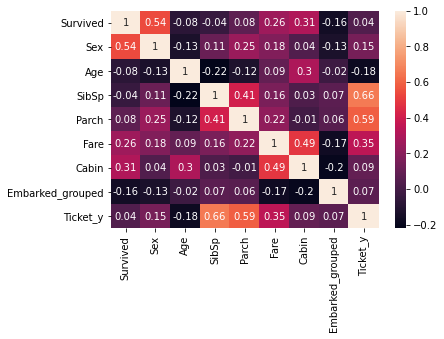

In [66]:
# aplicamos a todo el dataset ya que en este punto, todo será numérico
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Feature ranking:
1. feature Sex (0.298775)
2. feature Cabin (0.222999)
3. feature Age (0.150767)
4. feature Fare (0.105908)
5. feature Pclass (0.092710)
6. feature Ticket_y (0.043032)
7. feature Parch (0.034370)
8. feature SibSp (0.033147)
9. feature Embarked_grouped (0.018292)


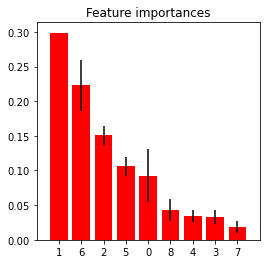

In [67]:
# Feature importances
def F_importances(X,y):
    # Construye un arbol para así conocer la importancia de las columnas
    forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
    columnas = X.columns.to_list()
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, columnas[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(4,4))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])

F_importances(X,y)

### Aplicar Estandarización

In [76]:
df['Pclass']=df['Pclass'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Sex               891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Cabin             891 non-null    int64  
 8   Embarked_grouped  891 non-null    int64  
 9   Ticket_y          891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.6 KB


In [78]:
def estandarizar(dataframe):
    media = dataframe.mean()
    desviacion_estandar = dataframe.std()
    return (dataframe - media)/desviacion_estandar

X = estandarizar(X)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_grouped,Ticket_y
0,0.826913,-0.737281,-0.610174,0.432550,-0.473408,-0.502163,-1.022587,0.618959,-0.578837
1,-1.565228,1.354813,0.385603,0.432550,-0.473408,0.786404,1.279688,-1.613803,-0.578837
2,0.826913,1.354813,-0.411018,-0.474279,-0.473408,-0.488580,0.128550,0.618959,-0.578837
3,-1.565228,1.354813,0.158442,0.432550,-0.473408,0.420494,1.279688,0.618959,0.155841
4,-1.565228,-0.737281,0.307808,0.432550,-0.473408,0.420494,1.279688,0.618959,0.155841
...,...,...,...,...,...,...,...,...,...
886,0.826913,-0.737281,-0.463919,-0.474279,-0.473408,-0.506188,-1.022587,0.618959,-0.578837
887,-0.369158,-0.737281,-0.356043,-0.474279,-0.473408,-0.386454,0.704119,0.618959,-0.578837
888,-1.565228,1.354813,-0.737758,-0.474279,-0.473408,-0.044356,1.855256,0.618959,-0.578837
889,-1.565228,-0.737281,-0.411018,-0.474279,-0.473408,-0.044356,1.279688,-1.613803,-0.578837


### (Opcional) Aplicar Feature Importances (con estandarizado)

Feature ranking:
1. feature Sex (0.298775)
2. feature Cabin (0.222999)
3. feature Age (0.150767)
4. feature Fare (0.105908)
5. feature Pclass (0.092710)
6. feature Ticket_y (0.043032)
7. feature Parch (0.034370)
8. feature SibSp (0.033147)
9. feature Embarked_grouped (0.018292)


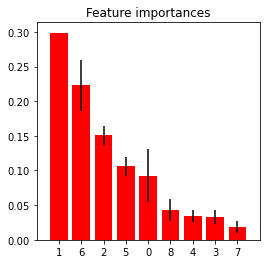

In [79]:
# se eliminarían columnas "no productivas" si son demasiadas
F_importances(X,y)

In [81]:
# Ya tendríamos nuestro dataset totalmente listo para la siguiente fase
df_guardar = pd.concat([X,y],axis=1)
df_guardar.to_csv("DW_titanic_end.csv")